In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [121]:
data_import = pd.read_csv('data/cell_samples.csv')
data_import.head()
#data_import.shape

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In Class,  2 = Benign & 4 = Malignant

In [122]:
#benign = data_import[data_import['Class'] == 2]
#malignant = data_import[data_import['Class'] == 4]
#px.scatter(benign, x = 'Clump', y = 'UnifSize')
#px.scatter(malignant, x = 'Clump', y = 'UnifSize')
#benign.head( )

In [123]:
px.scatter(data_import[0:100], x = 'Clump', y = 'UnifSize', color = 'Class')

In [124]:
data_import.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [125]:
data_import.drop(data_import[data_import['BareNuc']== '?'].index, inplace = True)
data_import['BareNuc'] = data_import['BareNuc'].astype('int64')
data_import.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [126]:
data_import.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [127]:
from sklearn.model_selection import train_test_split
x = data_import[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = data_import['Class']

x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.2, random_state = 4)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((546, 9), (137, 9), (546,), (137,))

In [128]:
from sklearn import svm
model = svm.SVC(kernel = 'rbf').fit(x_train, y_train)
y_ = model.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_)

0.9635036496350365

In [130]:
confusion_matrix(y_test, y_)

array([[85,  5],
       [ 0, 47]], dtype=int64)

[Text(0.5, 15.0, 'Predicted'), Text(33.0, 0.5, 'True')]

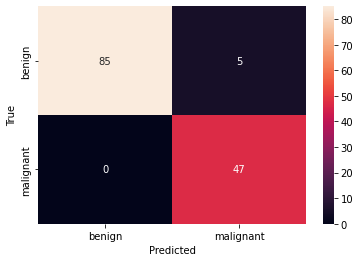

In [135]:
xlabel = ['benign', 'malignant']
ylabel = ['benign', 'malignant']
cf_matrix = pd.crosstab(y_test, y_)
sns.heatmap(confusion_matrix(y_test, y_), annot= True,
                             xticklabels = xlabel, yticklabels = ylabel,
                             ).set(xlabel = "Predicted", ylabel = "True")

In [132]:
print("True Value Count :\n", y_test.value_counts())
print("\nPredicted Value Counts :\n", np.unique(y_, return_counts=True))

True Value Count :
 2    90
4    47
Name: Class, dtype: int64

Predicted Value Counts :
 (array([2, 4], dtype=int64), array([85, 52], dtype=int64))


In [133]:
print(classification_report(y_test, y_))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [134]:
#f1 score & jaccard index using sklearn
from sklearn import metrics
print("f1 score :%.3f" %metrics.f1_score(y_test, y_, average = 'weighted'))
print("jaccard index :%.3f" %metrics.jaccard_score(y_test, y_, pos_label = 2))

f1 score :0.964
jaccard index :0.944
